In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import itertools
get_ipython().magic('matplotlib inline')
%config InlineBackend.figure_format = 'svg'

# DATA PREPROCESSING

In [2]:
from sklearn.preprocessing import LabelEncoder
#df = pd.DataFrame.from_records(data=Xy, columns=(iris['feature_names']+['species']))
#df = df.astype({'species':int})
df = pd.read_csv('../Datasets/iris.csv')
df.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species']

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [7]:
df.isnull().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
species              False
dtype: bool

In [8]:
means = df.groupby('species')['petal width (cm)'].mean()
print(means)

species
0    0.244
1    1.326
2    2.026
Name: petal width (cm), dtype: float64


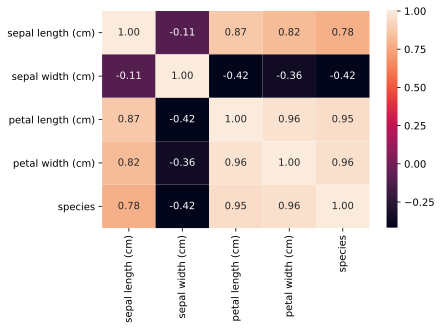

In [9]:
heat = sns.heatmap(df.corr(),annot=True, fmt='.2f')

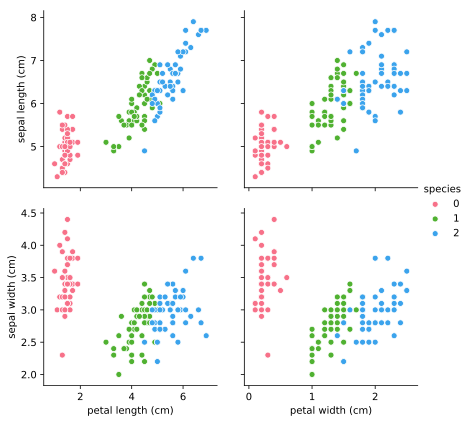

In [10]:
sns.pairplot(df, height = 3, hue = 'species', palette = 'husl', y_vars=['sepal length (cm)', 'sepal width (cm)'], x_vars=['petal length (cm)', 'petal width (cm)'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a14f3d828>,
      dtype=object)

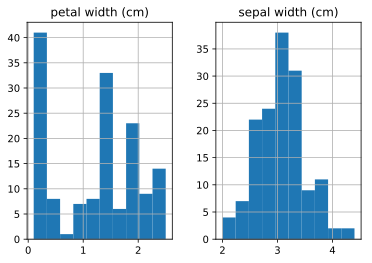

In [11]:
df.hist(column=['petal width (cm)','sepal width (cm)'], bins=10)

In [12]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:4].values
Y = df['species'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report 
def report(predictions, Y_test, labels):
    print('Confusion Matrix:\n\n',confusion_matrix(Y_test,predictions))
    print("\n")
    print('Classification Report:\n\n',classification_report(Y_test,predictions,target_names=labels))
    accuracy = accuracy_score(Y_test, predictions)
    print("Accuracy:%.2f%%" %(accuracy*100.0))
    print('Misclassified samples: %d' % (Y_test != predictions).sum())
    return

# DECISION TREE

In [15]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_std, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
pred = dtc.predict(X_test_std)

# PERCEPTRON

In [17]:
from sklearn.linear_model import Perceptron
pc = Perceptron(max_iter = 1000, eta0 = 0.01, shuffle = True, random_state = 1)
pc.fit(X_train_std, Y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.01,
      fit_intercept=True, max_iter=1000, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=1, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
pred = pc.predict(X_test_std)
report(pred, Y_test, ['0','1','2'])

Confusion Matrix:

 [[11  0  0]
 [ 0 11  2]
 [ 0  0  6]]


Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.85      0.92        13
           2       0.75      1.00      0.86         6

   micro avg       0.93      0.93      0.93        30
   macro avg       0.92      0.95      0.92        30
weighted avg       0.95      0.93      0.94        30

Accuracy:93.33%
Misclassified samples: 2


In [19]:
print(pc.coef_, '\n')
print(pc.score(X_test_std, Y_test))

[[-0.00389899  0.02480368 -0.03503337 -0.03051057]
 [-0.01113422 -0.03780755  0.01826801 -0.02018259]
 [-0.01746505 -0.01312428  0.14166919  0.12537737]] 

0.9333333333333333


# Linear Regression

In [20]:
df = pd.read_csv("../Datasets/BostonHousing.csv")
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


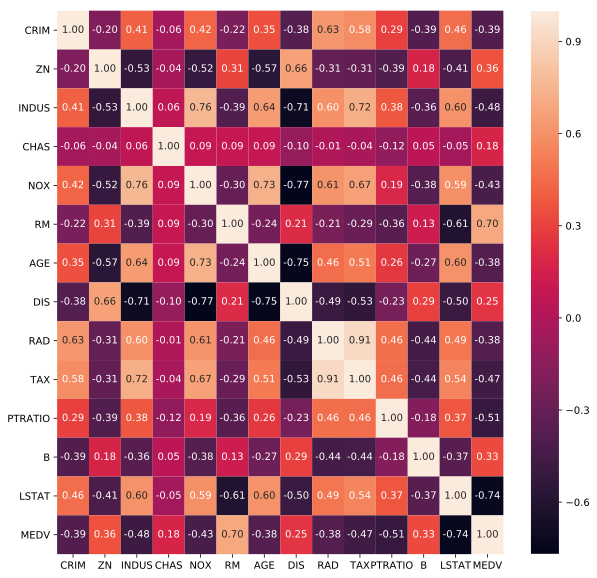

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='0.2f')

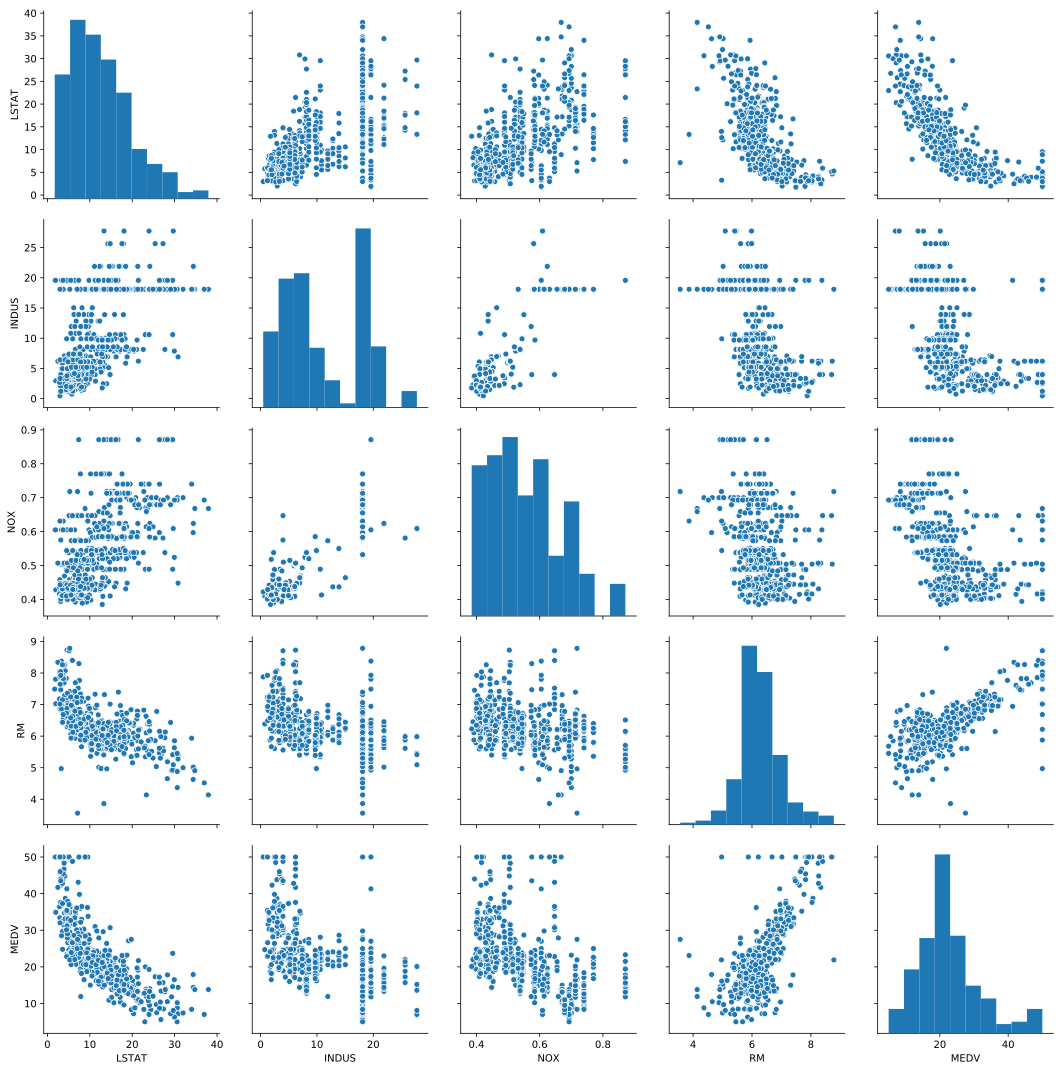

In [22]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], height=3, palette='husl')

In [23]:
X = df[['RM']].values
Y = df['MEDV'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [24]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_std, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
pred = lr.predict(X_test_std)
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)    
    return

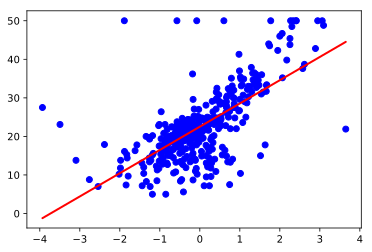

In [27]:
lin_regplot(X_train_std, Y_train, lr)

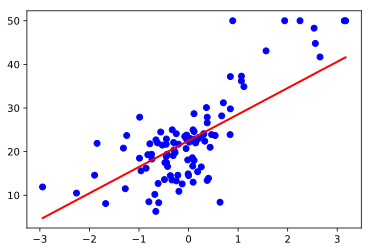

In [28]:
lin_regplot(X_test_std, Y_test, lr)

In [29]:
print('Coefficient',lr.coef_)
print('R2 Score',lr.score(X_test,Y_test))

Coefficient [6.03051546]
R2 Score -14.284384496013711


In [30]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('MSE %.3f' % (
        mean_squared_error(Y_test, pred)))
print('R^2 %.3f' % (
        r2_score(Y_test, pred)))

MSE 41.891
R^2 0.576


# Kmeans

In [31]:
df = pd.read_csv('../Datasets/iris.csv')
df.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species']

In [32]:
df1 = df[['sepal length (cm)', 'petal width (cm)']]
Y = df['species'].values
X = df1.iloc[:,].values

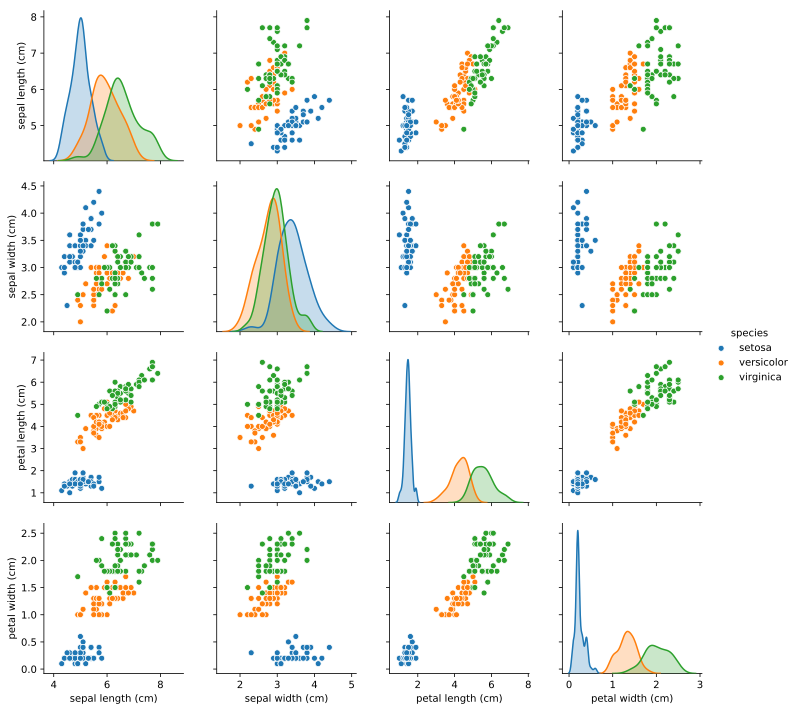

In [33]:
sns.pairplot(df, hue='species')

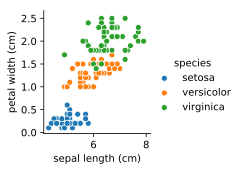

In [34]:
sns.pairplot(df, x_vars=["sepal length (cm)"], y_vars=["petal width (cm)"], hue="species")

In [35]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
km.fit(X)
y_km = km.predict(X)

In [36]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 32.77


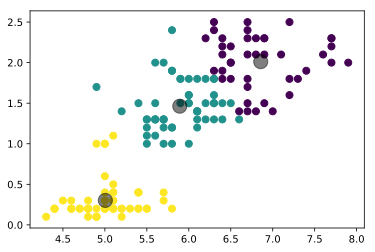

In [37]:
plt.scatter(X[:, 0], X[:, 1], c=y_km, s=50, cmap='viridis')

centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

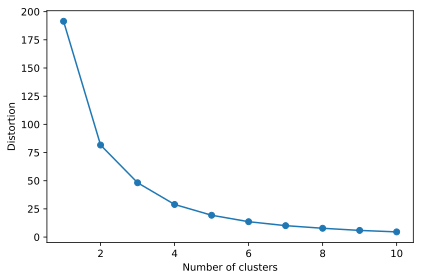

In [38]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X_train)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('images/11_03.png', dpi=300)
plt.show()

# LOGISTIC REGRESSION

In [39]:
X = df.iloc[:,2:4].values
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
Y = df['species'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [40]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)
X_test1 = np.array(X_test)

/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


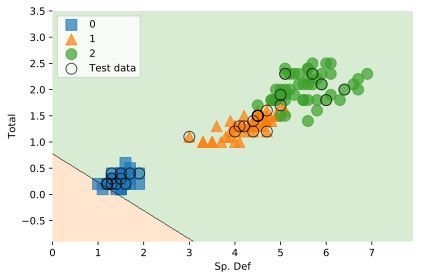

In [41]:
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression(C=100.0, random_state=0)
lor.fit(X_train_std, Y_train)

scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((Y_train, Y_test))
plot_decision_regions(X_combined, y_combined, clf=lor, legend=2,
                      X_highlight=X_test1,
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)
#plot_decision_regions(X_combined_std, y_combined, clf=lr, legend=2)

plt.xlabel('Sp. Def')
plt.ylabel('Total')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/logistic_regression.png', dpi=300)
plt.show()

In [42]:
pred = lor.predict(X_test_std)
report(pred, Y_test, ['0','1','2'])

Confusion Matrix:

 [[11  0  0]
 [ 0  7  6]
 [ 0  0  6]]


Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.54      0.70        13
           2       0.50      1.00      0.67         6

   micro avg       0.80      0.80      0.80        30
   macro avg       0.83      0.85      0.79        30
weighted avg       0.90      0.80      0.80        30

Accuracy:80.00%
Misclassified samples: 6


# MLP

In [43]:
X = df.iloc[:,:4].values
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
Y = df['species'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [44]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=1000, hidden_layer_sizes=(100,100,100))
mlp.fit(X_train_std, Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [45]:
pred = mlp.predict(X_test_std)
report(pred, Y_test, ['0','1','2'])

Confusion Matrix:

 [[11  0  0]
 [ 0 10  3]
 [ 0  0  6]]


Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.77      0.87        13
           2       0.67      1.00      0.80         6

   micro avg       0.90      0.90      0.90        30
   macro avg       0.89      0.92      0.89        30
weighted avg       0.93      0.90      0.90        30

Accuracy:90.00%
Misclassified samples: 3


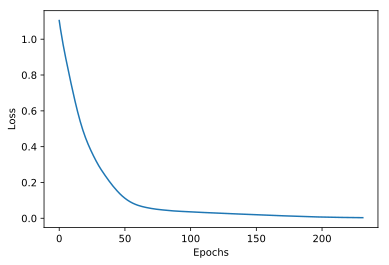

In [46]:
plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig('LossvsEpoch.png')
plt.show()

# SVM

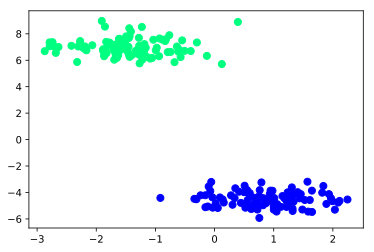

In [47]:
from sklearn.datasets.samples_generator import make_blobs
X,y = make_blobs(n_samples=200,centers=2,random_state=100,cluster_std=.60)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='winter')

In [48]:
def plot_scv_decision_function(model,ax=None,plot_support = True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    #create grid to evaluate model
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundry and margins
    ax.contour(X, Y, P, colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
    
    #plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                  model.support_vectors_[:,1],
                  s=300,linewidth=1,facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

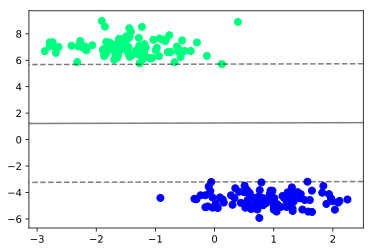

In [49]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="winter")
plot_scv_decision_function(svm)

The main function of the kernel is to transform the given dataset input data into the required form. There are various types of functions such as linear, polynomial, and radial basis function (RBF). Polynomial and RBF are useful for non-linear hyperplane. Polynomial and RBF kernels compute the separation line in the higher dimension. In some of the applications, it is suggested to use a more complex kernel to separate the classes that are curved or nonlinear. This transformation can lead to more accurate classifiers.

Regularization parameter in python's Scikit-learn C parameter used to maintain regularization. Here C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimization how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term. A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.

A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting. In other words, you can say a low value of gamma considers only nearby points in calculating the separation line, while the a value of gamma considers all the data points in the calculation of the separation line.

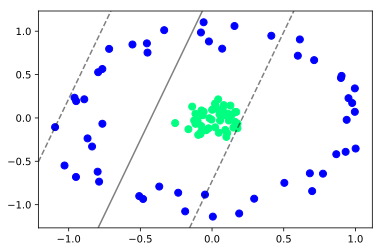

In [50]:
from sklearn.datasets.samples_generator import make_circles
X,y = make_circles(100,factor=.1,noise=.1)

clf = SVC(kernel='linear').fit(X,y)

plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='winter');
plot_scv_decision_function(clf,plot_support=False)

/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


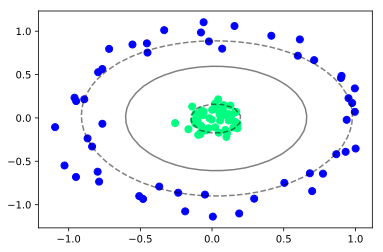

In [51]:
clf = SVC(kernel='rbf').fit(X,y)

plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='winter');
plot_scv_decision_function(clf,plot_support=False)